# Test Notebook for hyothesis tool

### Structure
Explanations for the use of the code cells is displayed as text above them. 
### Executing Code 
To run a cell either press the play button at the top navigation bar or ctrl + Enter when the cell is selected (shown by an outline around the cell), once variables or parameters are changed the cell needs to be run again

### Import all necessary functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('./analysis'))


In [3]:
from analysis import *
from analysis import scatter_correlation_plot

C:\Users\micha\Anaconda3\envs\CoronaDataDash\lib\site-packages\umap\spectral.py:4: NumbaDeprecationWarning:

No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!



Load an  excel sheet as data, based on absolute path, replace the file path "D:\\hypothesis\\..." with path to new sars excel sheet

In [4]:
df_sars = load_data("15052020SARS-CoV-2_final.xlsx",
                              two_sheets=False)

In [27]:
df_sars.dtypes

Kohorte B                                          Int64
Patienten-ID                                      string
Eingabedatum                                      string
Zeit von Symptombeginn bis sample collection 2     Int64
Zeit von Test bis Sample collection 2              Int64
                                                   ...  
NMI 229E S1                                        Int64
NMI NL63 N                                         Int64
NMI NL63 S1                                        Int64
NMI OC43 N                                         Int64
NMI OC43 S1                                        Int64
Length: 372, dtype: object

## $\color{red}{\text{All cells above this need to be executed before starting to analyze}}$

## Statisitical Tests

### Test Battery  
Define a list of variables of interest, perform appropriate tests for all combinations of variables in this list, generates a file called output.txt in the same directory as the notebook

In [24]:
variables = ['VII.1A', 'VII.1B', 'VII.1C', 'VII.2A', 'VII.2B', 'VII.2C', 'Geschlecht', 'III.6',
             'III.7', 'III.8', 'III.10', 'III.11', 'III.12', 'IX.1A', 'IX.2A', 'IX.1B', 'IX.2B', 'IX.1C', 'IX.2C' ]

In [25]:
output = test_battery(df_sars, sars_dict, variables, save=True)

H-Value: 0.007930451384254644, p-Value: 0.9290397244524612
H-Value: 13.378828063765463, p-Value: 0.0038850396714162575
                    Mäßig      Sehr     Wenig  Überhaupt nicht
Mäßig           -1.000000  0.202970  0.250681         1.000000
Sehr             0.202970 -1.000000  0.001972         1.000000
Wenig            0.250681  0.001972 -1.000000         0.385225
Überhaupt nicht  1.000000  1.000000  0.385225        -1.000000
H-Value: 2.8606884907681938, p-Value: 0.41360670319022497
H-Value: 8.124016772491942, p-Value: 0.04351699331606912
                    Mäßig      Sehr     Wenig  Überhaupt nicht
Mäßig           -1.000000  1.000000  1.000000         0.540161
Sehr             1.000000 -1.000000  0.772625         0.038062
Wenig            1.000000  0.772625 -1.000000         1.000000
Überhaupt nicht  0.540161  0.038062  1.000000        -1.000000
H-Value: 3.677999856924045, p-Value: 0.2983992616796254
H-Value: 6.349057732000164, p-Value: 0.09580919446797496
H-Value: 0.797403450419

Chi2: 28.4262324408546, p-Value: 0.0008093246740518938, DoF: 9
Chi2: 22.857251277383124, p-Value: 0.5282376469787935, DoF: 24
Chi2: 30.036296023000567, p-Value: 0.848029320228605, DoF: 39
Chi2: 45.094019129769634, p-Value: 0.46802404011887033, DoF: 45
Chi2: 57.870661268556, p-Value: 0.7518169072927764, DoF: 66
Chi2: 26.799010461966855, p-Value: 0.17760537964785536, DoF: 21
Chi2: 39.14708948060241, p-Value: 0.12246750255730694, DoF: 30
Chi2: 14.04084851520749, p-Value: 0.9457223989531827, DoF: 24
Chi2: 32.24345029685205, p-Value: 0.7696121399513824, DoF: 39
Chi2: 43.60902215839715, p-Value: 0.5309396936585412, DoF: 45
Chi2: 71.32786452394724, p-Value: 0.3052018452868949, DoF: 66
Chi2: 22.610074979626262, p-Value: 0.3651152474090889, DoF: 21
Chi2: 22.696674987199177, p-Value: 0.8275212046605249, DoF: 30
Chi2: 191.66933839498597, p-Value: 4.142919705290473e-06, DoF: 112
Chi2: 201.13668447293446, p-Value: 4.9819666970866e-06, DoF: 120
Chi2: 175.8039437098528, p-Value: 0.4899905119751861, D

### Individual Tests
Perform individual tests for selected variables

In [26]:
kw_result = kruskal_wallis(df_sars, cat_col='III.8', num_col='VII.1A')

H-Value: 8.124016772491942, p-Value: 0.04351699331606912
                    Mäßig      Sehr     Wenig  Überhaupt nicht
Mäßig           -1.000000  1.000000  1.000000         0.540161
Sehr             1.000000 -1.000000  0.772625         0.038062
Wenig            1.000000  0.772625 -1.000000         1.000000
Überhaupt nicht  0.540161  0.038062  1.000000        -1.000000


In [27]:
chi2_result = chi_2(df_sars, 'III.8', 'III.10')

Chi2: 17.406600586850086, p-Value: 0.0427165678105461, DoF: 9


In [28]:
numerical_correlation(df_sars, "VII.1A", 'VII.1B')

'Test: Spearman Correlation \nSpearman Rho: 0.8617975612074316, p-Value: 2.9927999153339284e-39 \n'

## Train Models

### Define data included in training the models

Iterate over all variables in the data and separate by variable type (categorical, numeric, datetime) and filter out variables with less than the desired number of entries. Includes all categorical and numerical variables if there are enough values available and if they are not specified to be excluded

In [7]:
# Exclude id and incorrectly identified datetime variable 
excluded_categorical_columns = ['Patienten-ID', 'III.4b: wenn ja, seit wann(Datum)?', 
                               'III.2Wann wurde der Abstrich durchgeführt(Datum)?', "Eingabedatum",
                               'III.18: Bis ungefähr wann hatten Sie Symptome(Datum)?']

In [25]:
excluded_numerical_columns = ["Spalte 25", 'III.8: Hatten Sie Fieber?', 'III.9: Wenn ja, bis zu welcher maximalenTemperatur?']

In [9]:
# Minimum number of entries for a variable
min_available = 20

Show the variables included in computation

In [26]:
num_columns, cat_columns = find_variables(df_sars,
                                          excluded_categorical_columns,
                                          excluded_numerical_columns,
                                          min_available=20,
                                          display=True
                                         )

Included numerical variables:

 ['Kohorte B', 'Zeit von Symptombeginn bis sample collection 2', 'Zeit von Test bis Sample collection 2', 'Symptomfreiheit bis Test 2', 'Alter', 'Altersgruppen; 40 Jahre', 'Altersgruppen; 30 Jahre', 'Altersgruppen; 50 Jahre', 'Altersgruppenverteilung 30, 30-49, 50', 'III.6: Haben Sie sich krank gefühlt?', 'III.6: gar nicht vs rest', 'III6: gar nicht/wenig vs. mäßig/sehr', 'III.7: Hatten Sie Husten? 2 2', 'III.7: gar nicht vs rest', 'III7: gar nicht/wenig vs. mäßig/sehr', 'III.8: gar nicht vs rest', 'III.8: gar nicht/wenig vs rest', 'Temp >38.5°C', 'Spalte 26', 'III.10: Hatten Sie Halsschmerzen? 2 2', 'III.10: gar nicht vs rest', 'III.10: gar nicht/wenig vs rest', 'III.11: Hatten Sie Kopfschmerzen? 2 2', 'III.11: gar nicht vs rest', 'III.11: gar nicht/wenig vs rest', 'III.12: Hatten Sie Geruchs- oderGeschmacksstörungen? 2 2', 'III.12: gar nicht vs rest', 'III.12: gar nicht/wenig vs rest', 'III.13: Hatten Sie Luftnot?', 'III.13: gar nicht vs rest', 'III.13:

## Classifier  
Train a classifier on a categorical variable with all the data (multi label and binary), calling the following function will use the previously selected data to train a classifier to classify the selected target. After training results will be displayed below.  
Setting ```tune_parameter = True``` will likely cause this to run for a long time on typical pc.  
Training a classifier to predict a categorical variable and output feature importances can be done in two ways.  
  
### Example 1:
Simply set the target and train a simple version of the model

0:	learn: 0.3144021	total: 5.46ms	remaining: 213ms
1:	learn: 0.2442751	total: 36.6ms	remaining: 696ms
2:	learn: 0.2346676	total: 64.8ms	remaining: 799ms
3:	learn: 0.1706022	total: 95.4ms	remaining: 858ms
4:	learn: 0.1679097	total: 103ms	remaining: 718ms
5:	learn: 0.1565096	total: 130ms	remaining: 736ms
6:	learn: 0.1474928	total: 159ms	remaining: 749ms
7:	learn: 0.1194546	total: 188ms	remaining: 752ms
8:	learn: 0.1056326	total: 219ms	remaining: 753ms
9:	learn: 0.0976430	total: 251ms	remaining: 753ms
10:	learn: 0.0904891	total: 281ms	remaining: 741ms
11:	learn: 0.0855047	total: 313ms	remaining: 731ms
12:	learn: 0.0802027	total: 344ms	remaining: 715ms
13:	learn: 0.0766063	total: 378ms	remaining: 701ms
14:	learn: 0.0728123	total: 412ms	remaining: 686ms
15:	learn: 0.0705267	total: 442ms	remaining: 663ms
16:	learn: 0.0666258	total: 472ms	remaining: 639ms
17:	learn: 0.0638958	total: 503ms	remaining: 614ms
18:	learn: 0.0606237	total: 532ms	remaining: 588ms
19:	learn: 0.0562634	total: 562ms	rem

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


{'learn': {'MultiClassOneVsAll': 0.028959877728794714}}


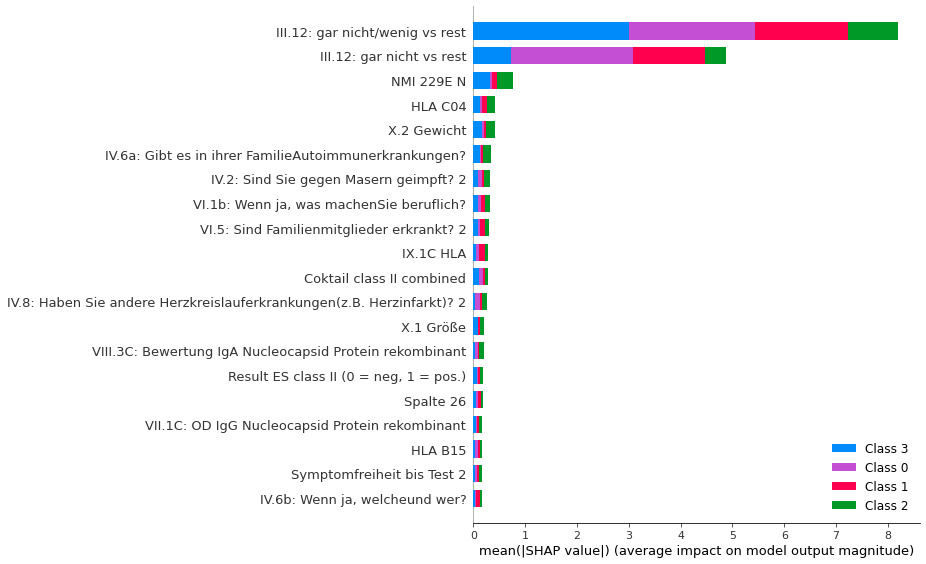

{'AUC:type=Mu': [0.8333333333333334, 0.8902116402116401, 0.9047619047619048, 0.8955026455026456, 0.8955026455026456, 0.9140211640211641, 0.917989417989418, 0.9444444444444445, 0.9576719576719577, 0.9656084656084656, 0.9576719576719577, 0.9497354497354498, 0.9708994708994708, 0.9708994708994708, 0.955026455026455, 0.9444444444444445, 0.9444444444444445, 0.9523809523809524, 0.955026455026455, 0.9603174603174603, 0.955026455026455, 0.9470899470899471, 0.9391534391534391, 0.9417989417989419, 0.9338624338624338, 0.9391534391534391, 0.9417989417989419, 0.9417989417989419, 0.9417989417989419, 0.9417989417989419, 0.9365079365079364, 0.9391534391534391, 0.9391534391534391, 0.9391534391534391, 0.9338624338624338, 0.9312169312169312, 0.9391534391534391, 0.9365079365079364, 0.9444444444444445, 0.9391534391534391]}


invalid value encountered in true_divide


In [28]:
classififier = gradient_boosting_classifier(df_sars,
                                            excluded_numerical_columns,
                                            excluded_categorical_columns,
                                            target='III.12: Hatten Sie Geruchs- oderGeschmacksstörungen? 2 2',
                                            tune_parameters=False)

### Example 2:
Binary Classifier using catboost models 

0:	learn: 0.3408533	total: 20.4ms	remaining: 794ms
1:	learn: 0.2608006	total: 46.6ms	remaining: 885ms
2:	learn: 0.1544155	total: 69.2ms	remaining: 853ms
3:	learn: 0.0890205	total: 93.7ms	remaining: 843ms
4:	learn: 0.0747622	total: 115ms	remaining: 808ms
5:	learn: 0.0564113	total: 136ms	remaining: 773ms
6:	learn: 0.0505602	total: 158ms	remaining: 744ms
7:	learn: 0.0388904	total: 182ms	remaining: 730ms
8:	learn: 0.0317685	total: 203ms	remaining: 700ms
9:	learn: 0.0272200	total: 224ms	remaining: 671ms
10:	learn: 0.0236253	total: 245ms	remaining: 645ms
11:	learn: 0.0200548	total: 264ms	remaining: 616ms
12:	learn: 0.0185714	total: 288ms	remaining: 598ms
13:	learn: 0.0163917	total: 309ms	remaining: 573ms
14:	learn: 0.0144793	total: 329ms	remaining: 549ms
15:	learn: 0.0135201	total: 350ms	remaining: 525ms
16:	learn: 0.0120960	total: 372ms	remaining: 503ms
17:	learn: 0.0113222	total: 392ms	remaining: 479ms
18:	learn: 0.0107178	total: 414ms	remaining: 458ms
19:	learn: 0.0101284	total: 435ms	rem

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
invalid value encountered in greater
invalid value encountered in less


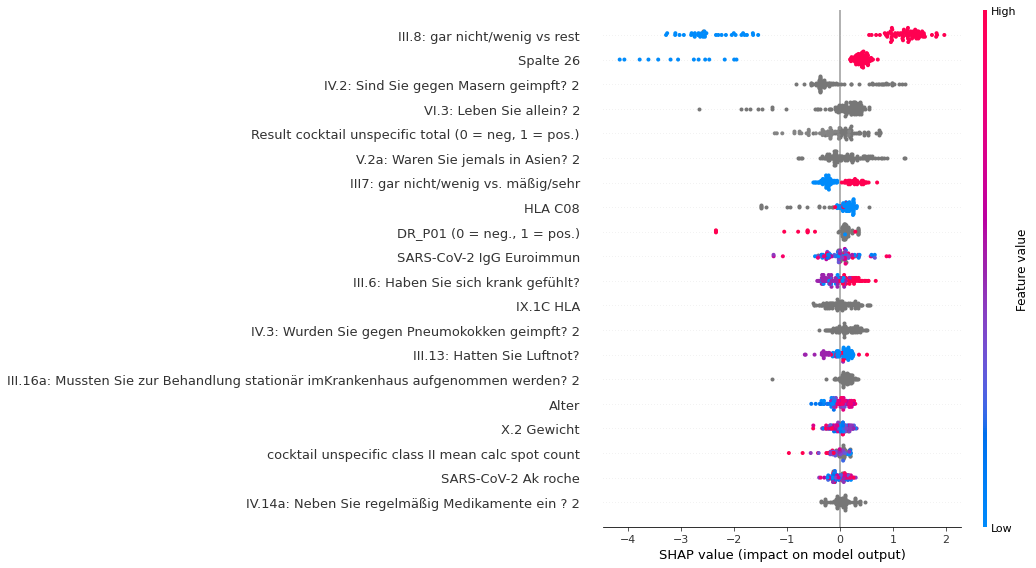

{'AUC': [0.5885416666666666, 0.6536458333333334, 0.5911458333333334, 0.6614583333333334, 0.6666666666666666, 0.625, 0.6197916666666666, 0.6354166666666666, 0.6302083333333334, 0.6458333333333334, 0.65625, 0.65625, 0.6614583333333334, 0.6875, 0.6979166666666666, 0.6822916666666666, 0.7135416666666666, 0.7135416666666666, 0.7239583333333334, 0.7135416666666666, 0.71875, 0.7447916666666666, 0.75, 0.75, 0.7708333333333334, 0.7708333333333334, 0.7760416666666666, 0.7760416666666666, 0.7760416666666666, 0.78125, 0.7864583333333334, 0.78125, 0.78125, 0.78125, 0.78125, 0.7864583333333334, 0.7760416666666666, 0.78125, 0.7864583333333334, 0.7864583333333334]}


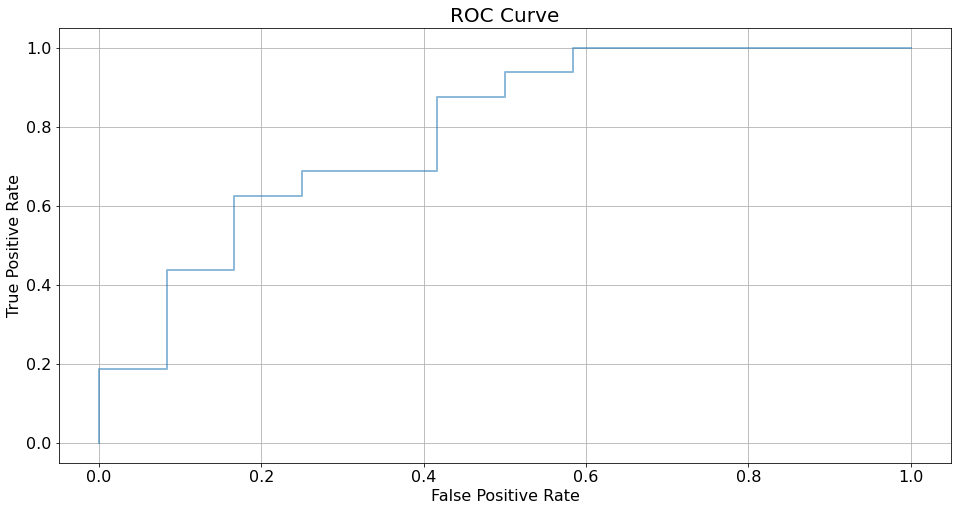

In [27]:
classifier = gradient_boosting_classifier(df_sars, excluded_numerical_columns, excluded_categorical_columns, 'Temp >38.5°C',
                                 tune_parameters=False)

## Regressor  
To train a model to predict a numerical variable in the data use this function, with the last entry of function paramters setting the target variable
### Example 1: Catboost

In [29]:
cb_regr = gradient_boosting_regressor(df_sars,
                            excluded_numerical_columns,
                            excluded_categorical_columns,
                            target='III.9: Wenn ja, bis zu welcher maximalenTemperatur?',
                            tune_parameters=False)

ValueError: list.remove(x): x not in list

### Example 2: Random Forest

In [ ]:
rf_regr = 

## Clustering

Group patients in high dimensional space based on all available data

### K-Means  
Standard K-Means attempts to cluster points based on n-dimensional euclidean distance

In [11]:
# Generate cluster data
cluster_data = create_cluster_data(df_sars, num_columns, cat_columns)

In [39]:
k_means_clusters = k_means_cluster(cluster_data, n_clusters=5)

### Clustering Based on Gaussian Mixture Models
Create clusters by attempting to fit a mixture of high dimensional gaussian models to the data

In [40]:
gmm_clusters = gmm_cluster(cluster_data, n_models=4)

### Clustering with variational bayesian Gaussian Mixture models
Using this algorithm one still has to set a number of clusters, but the model can ignore this number if the priors belonging to certain clusters are below a defined threshold

In [42]:
vbgmm_clusters = vbgmm_cluster(cluster_data, n_models=10)

### UMAP - HDB Scan clustering

In [19]:
embedding, labels = umap_clustering(cluster_data, min_cluster_size=10)

### Comparing clusters
Coloring the resulting points by a desired variable

### Extract clusters as new Excel sheets
To extract a selected number of clusters write them into the list given as the last argument of the function, this will create new excel sheets containing patients beloning to a cluster.  
To select clustering results of different clustering algorithm change the second argument

In [66]:
extract_clusters(df_sars, gmm_clusters, selected_clusters=[1,2,3])

## Plots  
Some exemplary overview plots of different types

### Matrix of continous variables grouped by a categorical variable
Select contious variables of interest and a single categorical variable to group them by

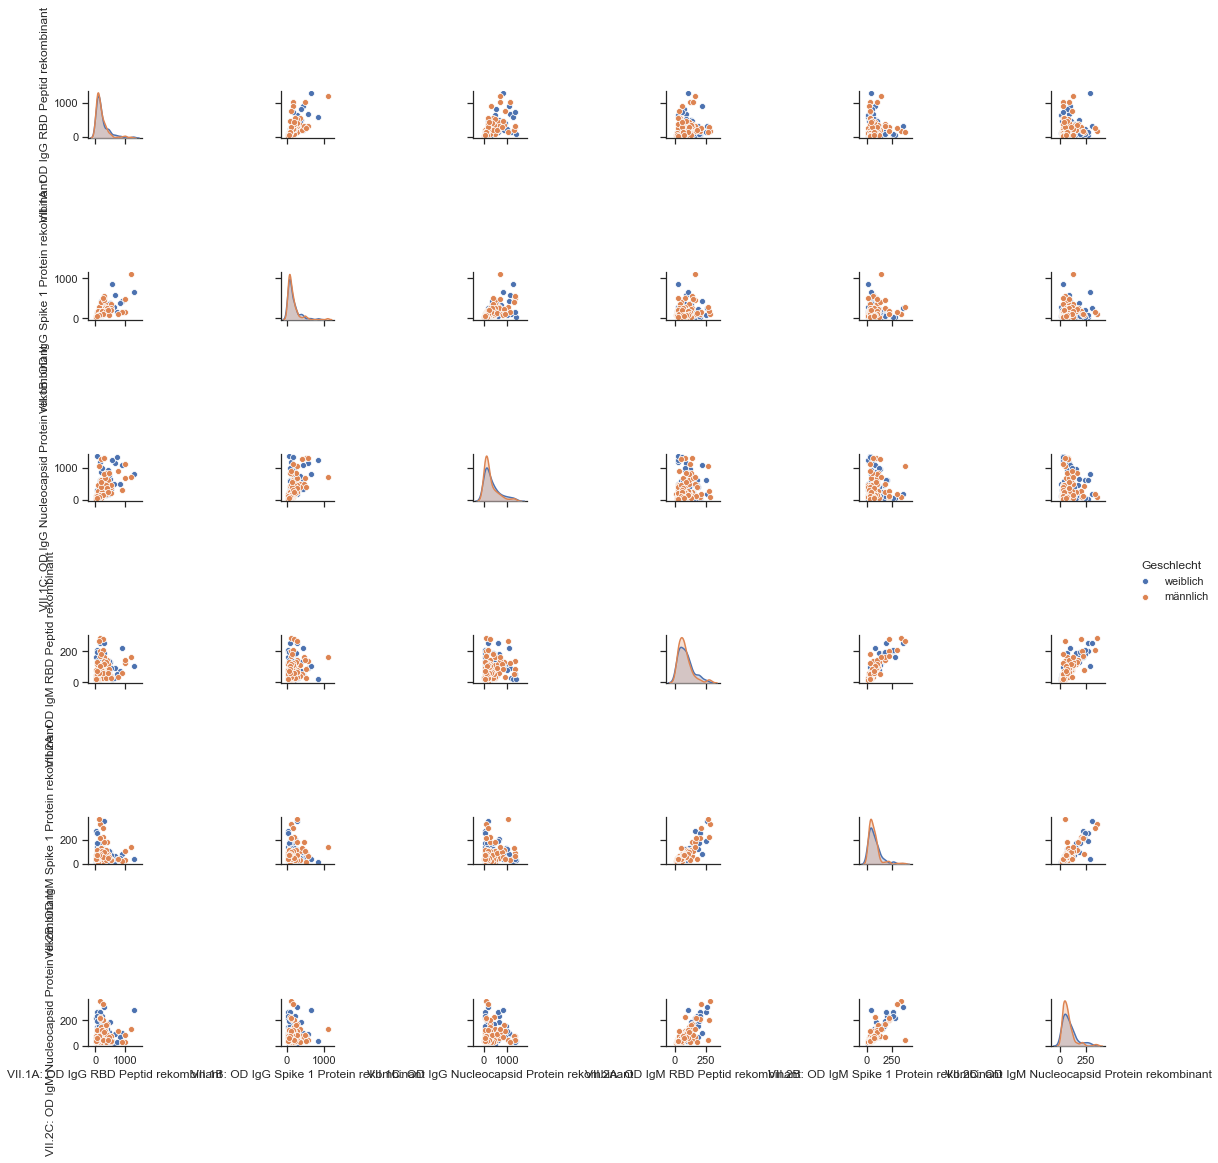

In [19]:
cat_var = "Geschlecht"
cont_vars = ['VII.1A: OD IgG RBD Peptid rekombinant',
             'VII.1B: OD IgG Spike 1 Protein rekombinant',
             'VII.1C: OD IgG Nucleocapsid Protein rekombinant',
             'VII.2A: OD IgM RBD Peptid rekombinant',
             'VII.2B: OD IgM Spike 1 Protein rekombinant',
             'VII.2C: OD IgM Nucleocapsid Protein rekombinant',
            ]
grouped_plot_matrix(df_sars, cont_vars, cat_var)

### Matrix of distributions of Continous Variables

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 1440x1440 with 0 Axes>

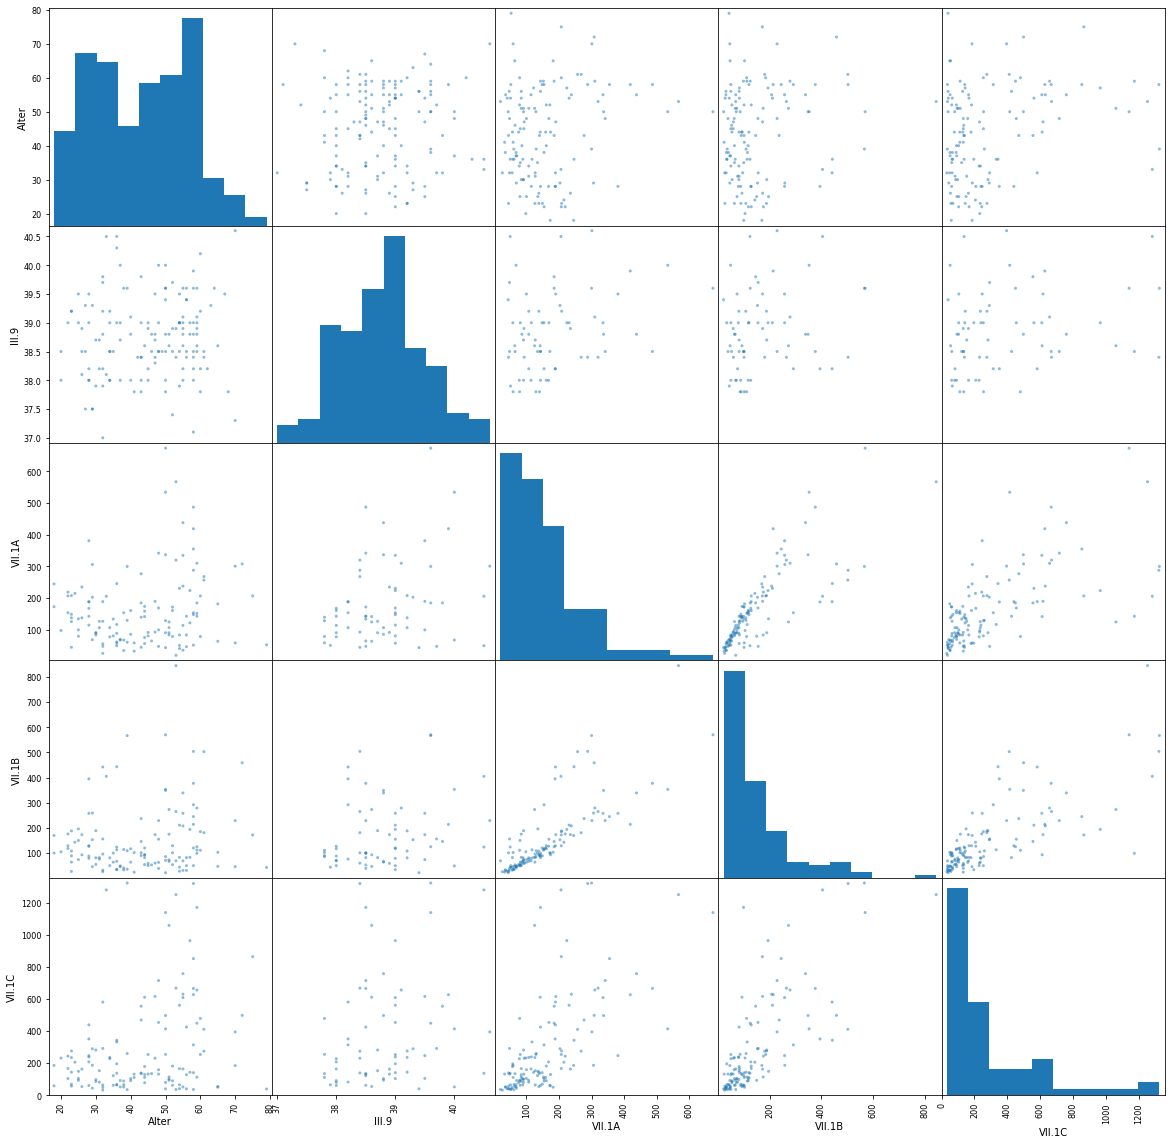

In [49]:
matrix_variables = ['Alter', 'III.9', 'VII.1A', 'VII.1B', 'VII.1C']
create_scatter_matrix(df_sars, selected_cols=matrix_variables)

### Boxplots  
Boxplots for plotting continous variables grouped by a categorical variable

In [21]:
grouped_box_plot(df_sars, 
                 "III.12", # categorical variable
                 ["VII.1A", "VII.2A", "VII.3A"], # list of continuous variables
                 y_title="RBD Peptid Rekombinant",
                 x_title="Loss of Taste/Smell",
                 title="RBD Peptid Rekombinant for loss of taste/smell",
                points=False)

### Scatter
Plot continuous variables as well as their correlation

In [22]:
scatter_correlation_plot(df_sars, "VII.1A", "VII.1B")

0.0000
